In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
a = np.zeros(100)
a[0] = 1
growth_rate = np.concatenate([
    np.repeat(1.4, 20),
    np.linspace(1.4, 1.2, 5),
    np.repeat(1.2, 15),
    np.linspace(1.2, 1.05, 5),
    np.repeat(1.05, 15),
    np.linspace(1.05, 1, 30),
    np.repeat(1, 200)
])[:100]
for v in range(len(a)):
    if v != 0:
        a[v] = a[v-1] * max(1, growth_rate[v])

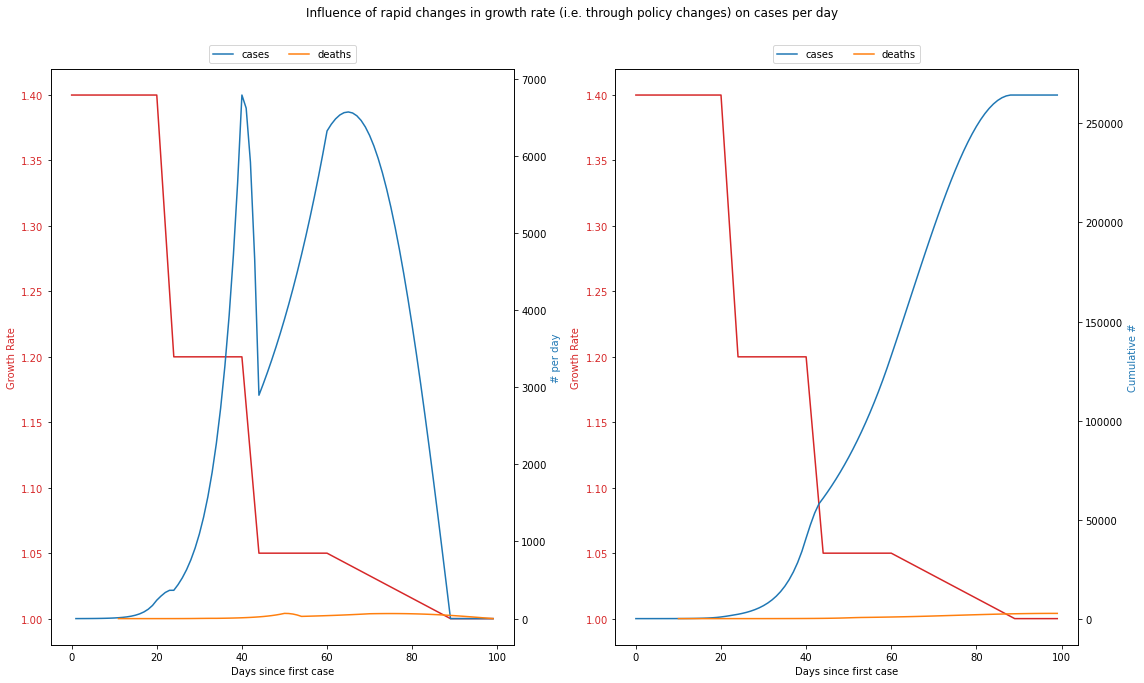

In [71]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate', color=color)
pd.Series(growth_rate).plot(ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='cases'),
    pd.Series(a * .01, name='deaths').shift(10)
], axis=1).diff().plot(ax=ax2).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate', color=color)
pd.Series(growth_rate).plot(ax=ax3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='cases'),
    pd.Series(a * .01, name='deaths').shift(10)
], axis=1).plot(ax=ax4).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of rapid changes in growth rate (i.e. through policy changes) on cases per day', y=1.05)
fig.set_facecolor('white')
plt.show()

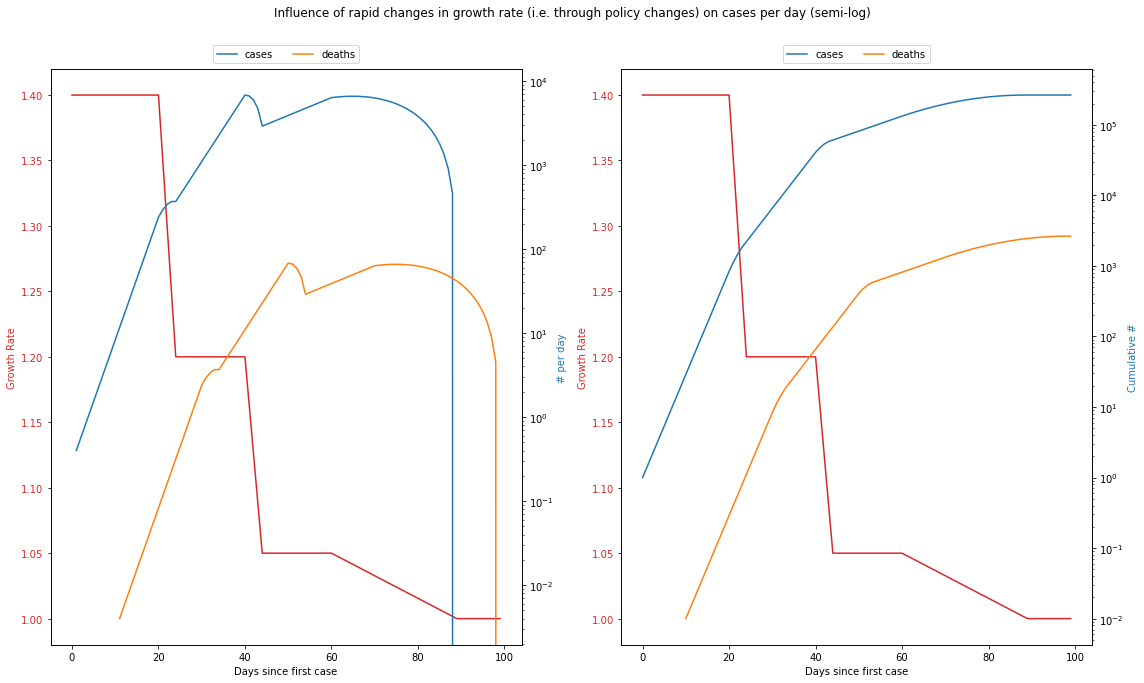

In [72]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate', color=color)
pd.Series(growth_rate).plot(ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='cases'),
    pd.Series(a * .01, name='deaths').shift(10)
], axis=1).diff().plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate', color=color)
pd.Series(growth_rate).plot(ax=ax3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='cases'),
    pd.Series(a * .01, name='deaths').shift(10)
], axis=1).plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of rapid changes in growth rate (i.e. through policy changes) on cases per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()

In [73]:
a = np.zeros(100)
b = np.zeros(100)
a[0] = 1
b[0] = 1
growth_rate_a = np.concatenate([
    np.repeat(1.4, 20),
    np.linspace(1.4, .9, 20),
    np.repeat(.9, 200)
])[:100]
growth_rate_b = np.concatenate([
    np.repeat(1.2, 100),
])[:100]
for v in range(len(a)):
    if v != 0:
        a[v] = a[v-1] * max(1, growth_rate_a[v])
        b[v] = b[v-1] * max(1, growth_rate_b[v])
result = a + b

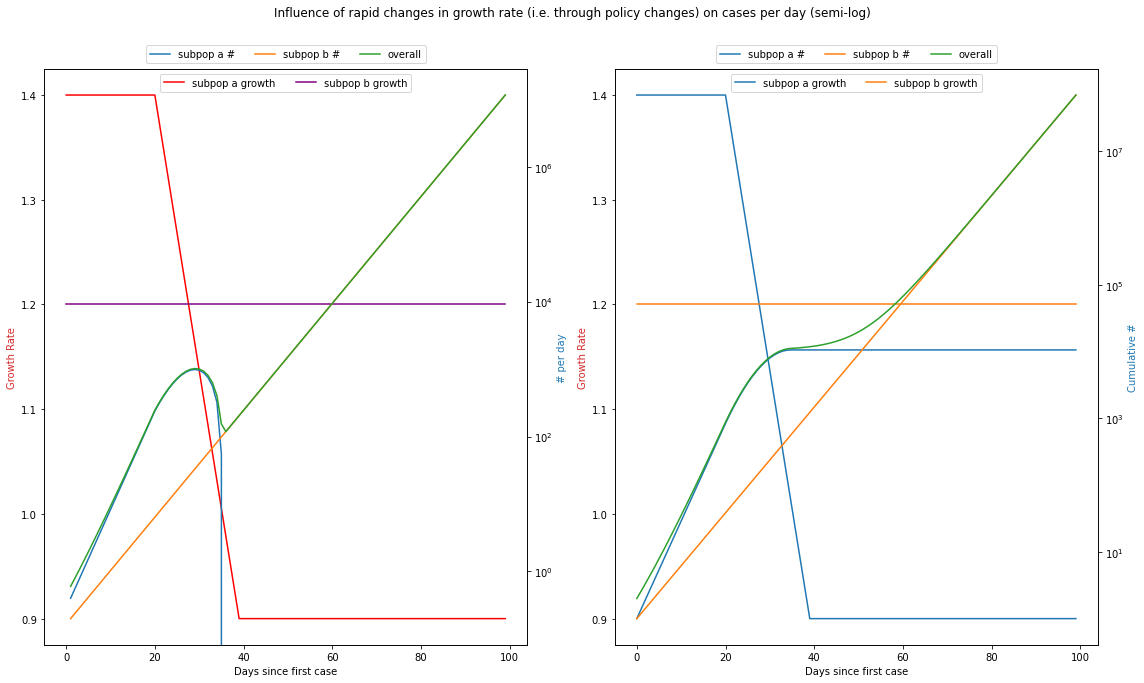

In [74]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate', color=color)
pd.concat([
    pd.Series(growth_rate_a, name='subpop a growth'),
    pd.Series(growth_rate_b, name='subpop b growth')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='subpop a #'),
    pd.Series(b, name='subpop b #'),
    pd.Series(result, name='overall'), 
], axis=1).diff().plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate', color=color)
pd.concat([
    pd.Series(growth_rate_a, name='subpop a growth'),
    pd.Series(growth_rate_b, name='subpop b growth')
], axis=1).plot(ax=ax3).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='subpop a #'),
    pd.Series(b, name='subpop b #'),
    pd.Series(result, name='overall'),
], axis=1).plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of rapid changes in growth rate (i.e. through policy changes) on cases per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()

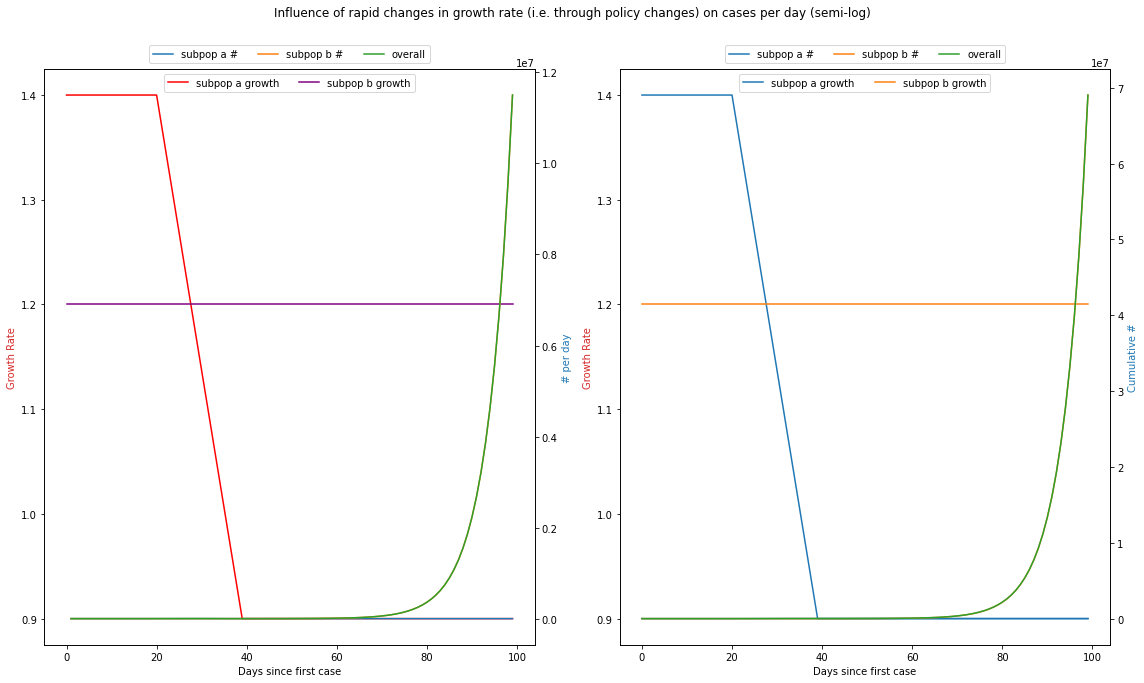

In [75]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate', color=color)
pd.concat([
    pd.Series(growth_rate_a, name='subpop a growth'),
    pd.Series(growth_rate_b, name='subpop b growth')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='subpop a #'),
    pd.Series(b, name='subpop b #'),
    pd.Series(result, name='overall'), 
], axis=1).diff().plot(ax=ax2).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate', color=color)
pd.concat([
    pd.Series(growth_rate_a, name='subpop a growth'),
    pd.Series(growth_rate_b, name='subpop b growth')
], axis=1).plot(ax=ax3).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #', color=color)  # we already handled the x-label with ax1
pd.concat([
    pd.Series(a, name='subpop a #'),
    pd.Series(b, name='subpop b #'),
    pd.Series(result, name='overall'),
], axis=1).plot(ax=ax4).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of rapid changes in growth rate (i.e. through policy changes) on cases per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()